In [3]:


import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import make_moons, make_circles, make_classification


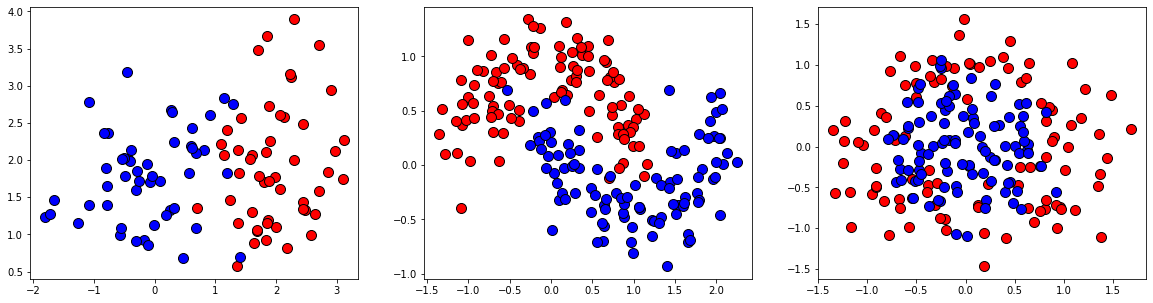

In [4]:
plot_colors = "rb"
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [linearly_separable,
            make_moons(n_samples = 200, noise=0.2, random_state=0),
            make_circles(n_samples = 200, noise=0.3, factor=0.5, random_state=1)
            ]


fig, ax = plt.subplots(1, 3, figsize=(20,5))
for fi in range(len(datasets)):
    dataset = datasets[fi]
    X = dataset[0]
    y = dataset[1]
    n_classes = len(np.unique(y))
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        ax[fi].scatter(X[idx, 0], X[idx, 1], c=color,  cmap=plt.cm.RdYlBu, edgecolor='black', s=100)

In [65]:


def plot_tree(clf,X,y):
  n_classes = 2
  plot_colors = "rb"
  plot_step = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
  plt.axis("tight")
  # Plot the training points
  for i, color in zip([0,1], plot_colors):
      idx = np.where(y == i)
      plt.scatter(X[idx, 0], X[idx, 1], c=color,  cmap=plt.cm.Paired)
  plt.show()
# plot_tree(clf)

# plot_tree(my_stump, X)


# Stumps

In [86]:
from sklearn import tree


class My_stump:
  def __init__(self):
    self.dimension = None
    self.scalar = None
  
  def gini_impurity(self, X, y): 
    n = X.shape[0]
    p0 = len([e for e in y if e == 0])/n
    return 1 - p0**2 - (1 - p0)**2
    
  def fit(self, X, y):
    d = X.shape[1]
    n = X.shape[0]
    gini_min = self.gini_impurity(X, y)
    for d in range(X.shape[1]):
        NuS0, NuS1 = 0, 0
        NoS0, NoS1 = len([e for e in y if e == 0]), len([e for e in y if e == 1])
        index = np.argsort(X[:,d])
        i = 1
        while i < n - 1:
            k = i
            while X[index[i]][d] == X[index[k]][d] :
                if y[index[k]] == 0:
                    NuS0 += 1
                    NoS0 -= 1
                else:
                    NuS1 += 1
                    NoS1 -= 1
                k += 1
            GuS = 1 - (NuS0/(NuS0 + NuS1))**2 - (NuS1/(NuS0 + NuS1))**2
            GoS = 1 - (NoS0/(NoS0 + NoS1))**2 - (NoS1/(NoS0 + NoS1))**2
            gini = ((NuS0 + NuS1)*GuS + (NoS0 + NoS1)*GoS)/(NoS0 + NoS1 + NuS0 + NuS1)
            if gini < gini_min :
                gini_min = gini
                self.dimension = d
                self.scalar = X[index[i]][d]
            i += 1

  def predict(self, X) :
    y = []
    for x in X:
        if x[self.dimension] < self.scalar:
            y.append(0)
        else:
            y.append(1)
    return np.array(y)


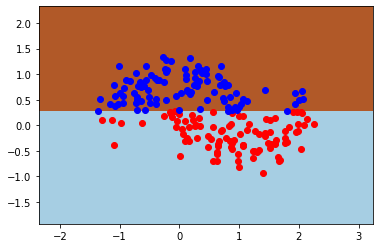

In [87]:
dataset = datasets[1]
my_stump = My_stump()
my_stump.fit(dataset[0], dataset[1])
predicted = my_stump.predict(dataset[0])
plot_tree(my_stump, dataset[0], predicted)

# Random forests

In [88]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.get('data')
y = data.get('target')

In [89]:
for i in range(5):
    print(X[i])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
[2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
 7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
 5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
 2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
 2.750e-01 8.902e-02]
[1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
 1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
 6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
 2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
 3.613e-01 8.758e-02]
[1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414e-01
 1.052e-01 

In [90]:
class My_forest:
  def __init__(self, nbags, nfeatures, X, y):
    self.nbags = nbags
    self.nfeatures = np.sqrt(y.shape[0])
    self.dimensions = []
    self.scalars = []
    self.X = X
    self.y = y
    
  def fit(self):
    bags = []
    labels = []
    n = self.X.shape[0]
    
    # init bags
    for i in range(self.nbags) :
        bag = []
        label = []
        for j in range(n) :
            index = np.random.randint(n)
            bag.append(self.X[index])
            label.append(self.y[index])
        bags.append(bag)
        labels.append(label)
    bags = np.array(bags)
    labels = np.array(labels)
    
    for i in range(self.nbags):
        # choose randomly nfeatures features to keep
        features = np.random.randint(0, n, self.nfeatures)
        stump = My_stump()
        # fit a stump for the bag
        stump.fit(bags[i][:,features], labels[i])
        self.dimensions.append(stump.dimension)
        self.scalars.append(stump.scalar)
      
  def predict(self,X_new):
    return self.dimensions
  


my_stump = My_stump()
my_stump.fit(X, y)
my_stump.predict(X)


ZeroDivisionError: division by zero